In [80]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.widgets import RadioButtons
import matplotlib.cm as cm
import matplotlib.colors as colors
import seaborn as sns
sns.set()
state = pd.read_csv('states.csv')

In [49]:
import matplotlib.pyplot as plt
from matplotlib.widgets import AxesWidget, RadioButtons

class MyRadioButtons(RadioButtons):

    def __init__(self, ax, labels, active=0, activecolor='blue', size=49,
                 orientation="vertical", **kwargs):
        """
        Add radio buttons to an `~.axes.Axes`.
        Parameters
        ----------
        ax : `~matplotlib.axes.Axes`
            The axes to add the buttons to.
        labels : list of str
            The button labels.
        active : int
            The index of the initially selected button.
        activecolor : color
            The color of the selected button.
        size : float
            Size of the radio buttons
        orientation : str
            The orientation of the buttons: 'vertical' (default), or 'horizontal'.
        Further parameters are passed on to `Legend`.
        """
        AxesWidget.__init__(self, ax)
        self.activecolor = activecolor
        axcolor = ax.get_facecolor()
        self.value_selected = None

        ax.set_xticks([])
        ax.set_yticks([])
        ax.set_navigate(False)

        circles = []
        for i, label in enumerate(labels):
            if i == active:
                self.value_selected = label
                facecolor = activecolor
            else:
                facecolor = axcolor
            p = ax.scatter([],[], s=size, marker="o", edgecolor='black',
                           facecolor=facecolor)
            circles.append(p)
        if orientation == "horizontal":
            kwargs.update(ncol=len(labels), mode="expand")
        kwargs.setdefault("frameon", False)    
        self.box = ax.legend(circles, labels, loc="center", **kwargs)
        self.labels = self.box.texts
        self.circles = self.box.legendHandles
        for c in self.circles:
            c.set_picker(5)
        self.cnt = 0
        self.observers = {}

        self.connect_event('pick_event', self._clicked)


    def _clicked(self, event):
        if (self.ignore(event) or event.mouseevent.button != 1 or
            event.mouseevent.inaxes != self.ax):
            return
        if event.artist in self.circles:
            self.set_active(self.circles.index(event.artist))

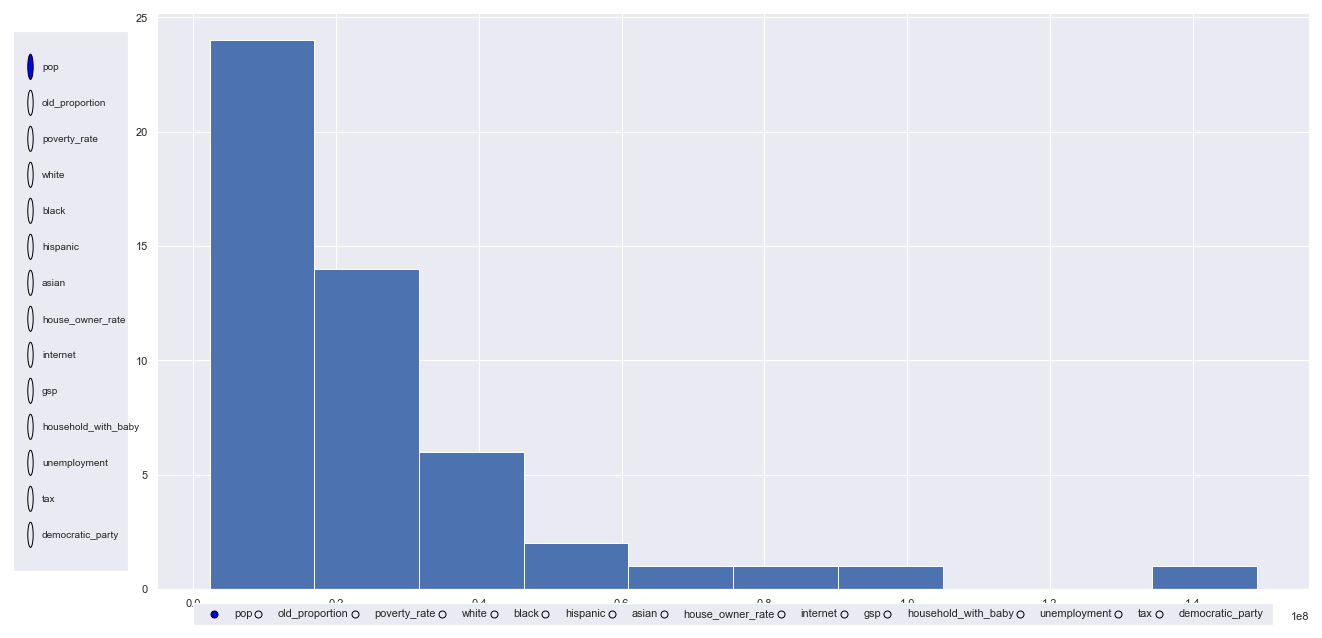

In [62]:
fig = plt.figure(figsize=(20,10))
main =plt.axes([0.1,0.1,0.8,0.8])
ax1 =plt.axes([0.125,0.05,0.75,0.03])
ax2 = plt.axes([0,0.125,0.08,0.75])
slider1 = MyRadioButtons(ax1,['pop', 'old_proportion', 'poverty_rate', 'white',
       'black', 'hispanic', 'asian', 'house_owner_rate', 'internet', 'gsp',
       'household_with_baby', 'unemployment', 'tax', 'democratic_party'],orientation="horizontal")
slider2 =RadioButtons(ax2,['pop', 'old_proportion', 'poverty_rate', 'white',
       'black', 'hispanic', 'asian', 'house_owner_rate', 'internet', 'gsp',
       'household_with_baby', 'unemployment', 'tax', 'democratic_party'])
dot, = main.plot(state[slider1.value_selected],state[slider2.value_selected],'o')
def updata1(label) :
    dot.set_data(state[label],state[slider2.value_selected])
    lab = np.max(state[label])-np.min(state[label])
    main.set_xlim(np.min(state[label])-0.1*lab,np.max(state[label])+0.1*lab)
    fig.canvas.draw_idle()
slider1.on_clicked(updata1)
def updata2(label) :
    dot.set_data(state[slider1.value_selected],state[label])
    lab = np.max(state[label])-np.min(state[label])
    main.set_ylim(np.min(state[label])-0.1*lab,np.max(state[label])+0.1*lab)
    fig.canvas.draw_idle()
slider2.on_clicked(updata2)
plt.show()
